<a href="https://colab.research.google.com/github/santiagonajera/CriticidadMantenimiento/blob/main/Criticidad_Mantenimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

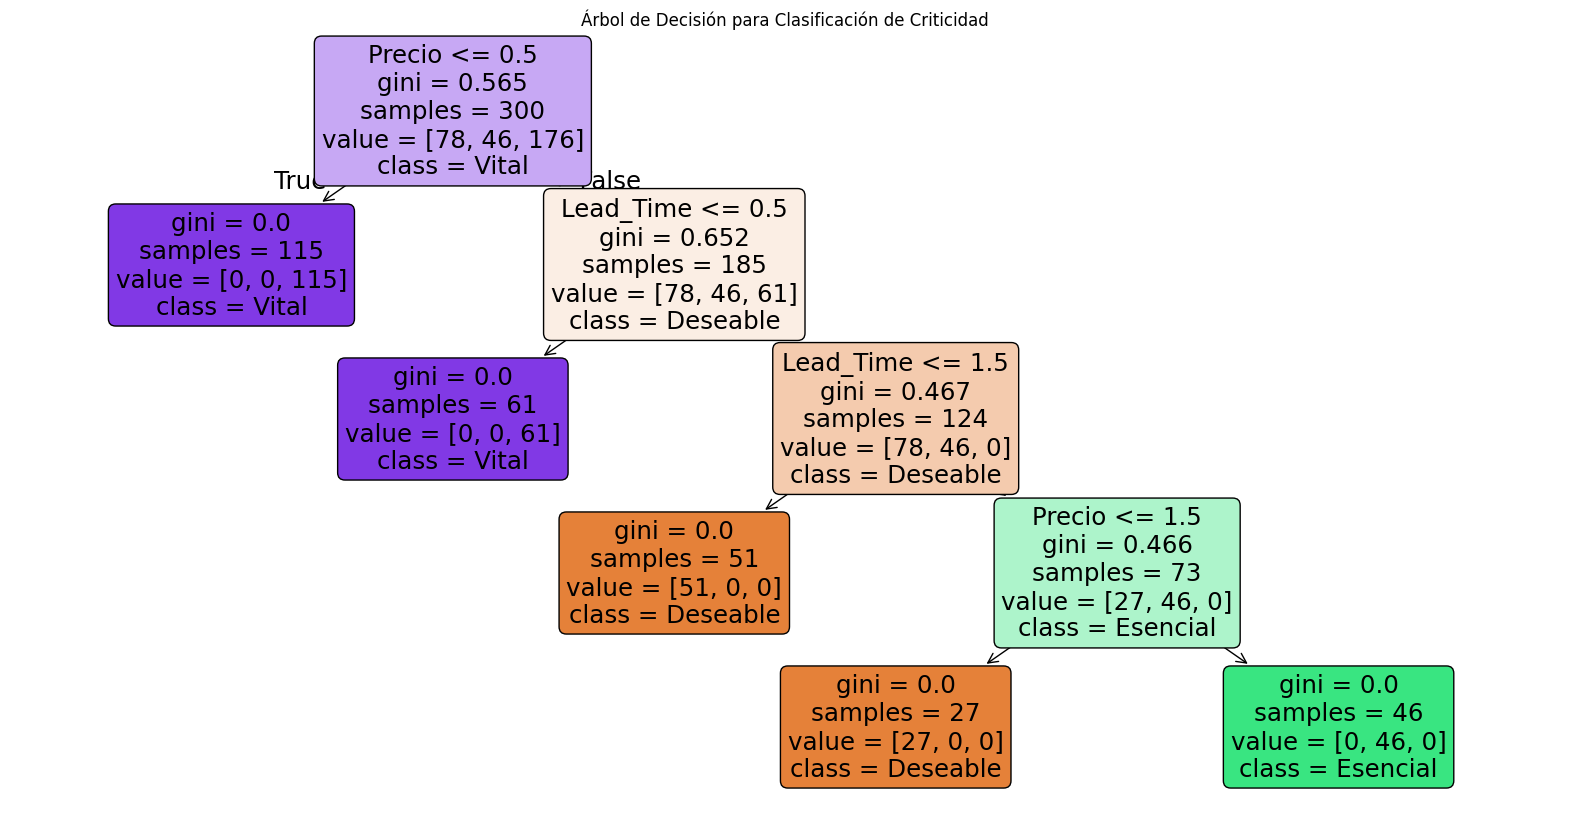

<ipython-input-2-e91d97fc8e4f>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Criticidad_Predicha", data=data_aplicacion, order=data_aplicacion["Criticidad_Predicha"].unique(), palette="viridis")


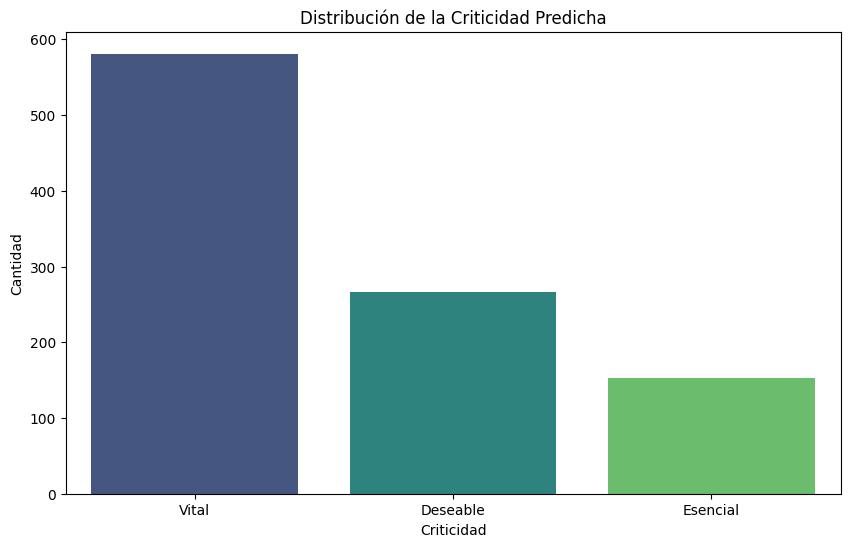

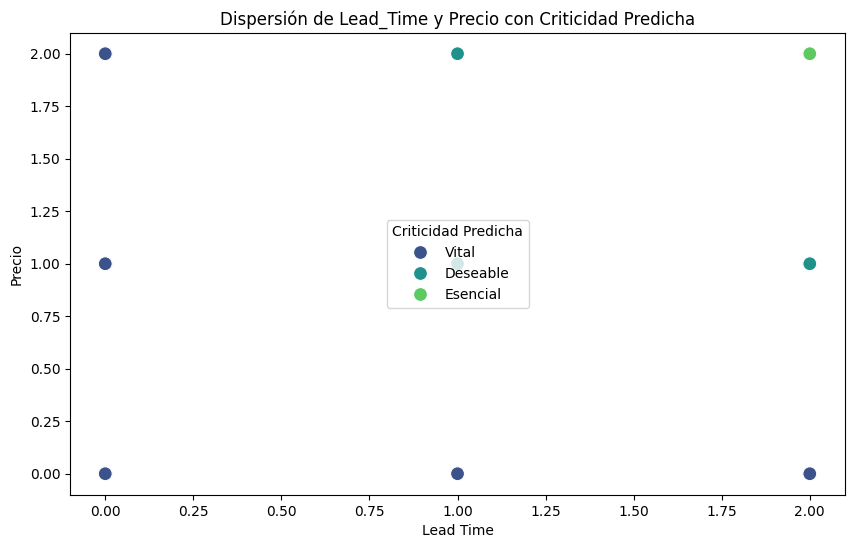

OSError: Cannot save file into a non-existent directory: 'D:'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import NotFittedError

# Cargar los datos
url_entrenamiento = "https://github.com/santiagonajera/CriticidadMantenimiento/raw/refs/heads/main/data_entrenamiento.csv"
url_aplicacion = "https://github.com/santiagonajera/CriticidadMantenimiento/raw/refs/heads/main/data_aplicacion.csv"
data_entrenamiento = pd.read_csv(url_entrenamiento)
data_aplicacion = pd.read_csv(url_aplicacion)

# Codificar variables categóricas
encoder_lt = LabelEncoder()
encoder_pr = LabelEncoder()
encoder_cr = LabelEncoder()

try:
    data_entrenamiento["Lead_Time"] = encoder_lt.fit_transform(data_entrenamiento["Lead_Time"])
    data_entrenamiento["Precio"] = encoder_pr.fit_transform(data_entrenamiento["Precio"])
    data_entrenamiento["Criticidad"] = encoder_cr.fit_transform(data_entrenamiento["Criticidad"])

    data_aplicacion["Lead_Time"] = encoder_lt.transform(data_aplicacion["Lead_Time"])
    data_aplicacion["Precio"] = encoder_pr.transform(data_aplicacion["Precio"])
except NotFittedError as e:
    print("Error al codificar los datos: asegúrese de que las categorías de los datos de aplicación coincidan con las de entrenamiento.")
    raise e

# Separar características y etiquetas
X_train = data_entrenamiento[["Lead_Time", "Precio"]]
y_train = data_entrenamiento["Criticidad"]
X_aplicacion = data_aplicacion[["Lead_Time", "Precio"]]

# Crear y entrenar el modelo de árbol de decisión
modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo.fit(X_train, y_train)

# Realizar predicciones en los datos de aplicación
data_aplicacion["Criticidad_Predicha"] = modelo.predict(X_aplicacion)

# Mapear valores predichos a las etiquetas originales
data_aplicacion["Criticidad_Predicha"] = encoder_cr.inverse_transform(data_aplicacion["Criticidad_Predicha"])

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=["Lead_Time", "Precio"], class_names=encoder_cr.classes_, filled=True, rounded=True)
plt.title("Árbol de Decisión para Clasificación de Criticidad")
plt.show()

# Visualización de distribuciones de la criticidad predicha
plt.figure(figsize=(10, 6))
sns.countplot(x="Criticidad_Predicha", data=data_aplicacion, order=data_aplicacion["Criticidad_Predicha"].unique(), palette="viridis")
plt.title("Distribución de la Criticidad Predicha")
plt.xlabel("Criticidad")
plt.ylabel("Cantidad")
plt.show()

# Gráfico de dispersión de las características con criticidad predicha
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Lead_Time", y="Precio", hue="Criticidad_Predicha", data=data_aplicacion,
                palette="viridis", s=100)
plt.title("Dispersión de Lead_Time y Precio con Criticidad Predicha")
plt.xlabel("Lead Time")
plt.ylabel("Precio")
plt.legend(title="Criticidad Predicha")
plt.show()

# Guardar resultados predichos en un archivo CSV
data_aplicacion.to_csv("D:/data_aplicacion_clasificada.csv", index=False)
